In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%autoreload 2

# Предобработка датасета

In [16]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
import pandas as pd
import numpy as np

data = pd.read_csv("Steel_industry_data.csv")

scaler = MinMaxScaler()
ohe = OneHotEncoder(sparse_output=False)

cat_features = ["WeekStatus", "Day_of_week", "Load_Type"]
numeric_features = list(set(data.columns) - set(cat_features) - set(["date", "Usage_kWh"]))

one_hot_df = pd.DataFrame(ohe.fit_transform(data[cat_features]), 
                          columns=ohe.get_feature_names_out(cat_features))

data = pd.concat([data.drop(columns=cat_features), one_hot_df], axis=1)

data[numeric_features] = scaler.fit_transform(data[numeric_features])
data.drop(columns=["date"], inplace=True)
X = data.drop(columns=["Usage_kWh"]).to_numpy()
y = np.log(data["Usage_kWh"].to_numpy().reshape(-1, 1))


C:\Users\Ilya\AppData\Local\Temp\ipykernel_7352\3550274129.py:21: RuntimeWarning: divide by zero encountered in log
  y = np.log(data["Usage_kWh"].to_numpy().reshape(-1, 1))


In [17]:
X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_test = X[int(0.8 * len(X)):]
y_test = y[int(0.8 * len(y)):]

In [18]:
window_size = 5
X_train_new = []
y_train_new = []
for row in range(window_size, X_train.shape[0]):
    X_train_new.append(X_train[row - window_size : row])
    y_train_new.append(y_train[row])

X_train = np.asarray(X_train_new)
y_train = np.asarray(y_train_new)

X_test_new = []
y_test_new = []
for row in range(window_size, X_test.shape[0]):
    X_test_new.append(X_test[row - window_size : row])
    y_test_new.append(y_test[row])

X_test = np.asarray(X_test_new)
y_test = np.asarray(y_test_new)

# RNN

In [ ]:
from nn.rnn_model import SequenceRNN
from nn.losses.mse import MSE
import numpy as np
from nn.optimizers.adam import Adam

n_in = 18
n_out = 1
n_hidden = 128
model = SequenceRNN(n_inputs=n_in, n_hidden=n_hidden, n_outputs=n_out, time_steps=5)
optimizer = Adam(learning_rate=0.001)

# X = np.random.randn(64, 5, n_in)     # (batch, time, features)
# y = np.random.randint(0, n_out, size=64)  # one-hot labels (batch, n_out)

loss = MSE()
history = model.train(X_train[:1000], y_train[:1000], X_test, y_test, epochs=10, batch_size=16, learning_rate=1e-3, loss_fn=loss, optimizer=optimizer)

  0%|          | 0/1751.6875 [00:00<?, ?it/s]

100%|█████████▉| 1750/1751.6875 [00:11<00:00, 140.42it/s]d:\vscode\Учеба\FOSII\venv\Lib\site-packages\tqdm\std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 1752/1751.6875 [00:11<00:00, 146.15it/s]


y_pred=array([1.62286102]) cur_y=array([1.55814462])
loss_vals=np.float64(0.0020941061778575218)
y_pred=array([1.53515729]) cur_y=array([1.54329811])
loss_vals=np.float64(3.313646241831406e-05)
y_pred=array([1.49754338]) cur_y=array([1.53471437])
loss_vals=np.float64(0.0006908410666385656)
y_pred=array([1.51179142]) cur_y=array([1.28093385])
loss_vals=np.float64(0.026647610020123357)
y_pred=array([1.34844411]) cur_y=array([1.26976054])
loss_vals=np.float64(0.003095551823506758)
y_pred=array([1.30705375]) cur_y=array([1.28093385])
loss_vals=np.float64(0.0003411247600862812)
y_pred=array([1.31272454]) cur_y=array([1.26129787])
loss_vals=np.float64(0.0013223510288457219)
y_pred=array([1.30059855]) cur_y=array([1.24990174])
loss_vals=np.float64(0.0012850833542199765)
y_pred=array([1.29671714]) cur_y=array([1.24990174])
loss_vals=np.float64(0.0010958410856280922)
y_pred=array([1.2922527]) cur_y=array([1.26129787])
loss_vals=np.float64(0.0004791008631733426)
y_pred=array([1.28532718]) cur_y=

 18%|█▊        | 310/1751.6875 [00:01<00:09, 156.64it/s]


KeyboardInterrupt: 

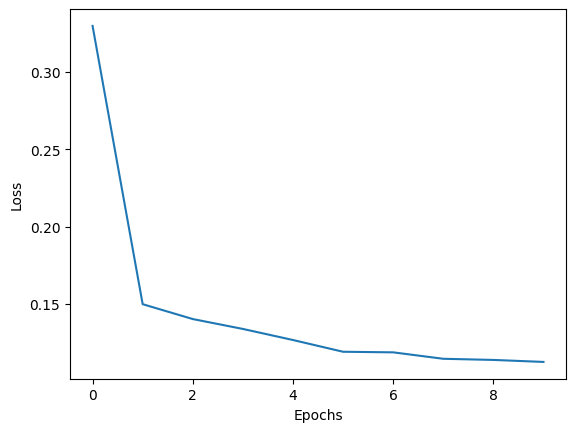

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['train_loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
predictions = []
for elem in X_train:
    predictions.append(model.forward(elem))

predictions = np.array(predictions).flatten()

In [ ]:
np.mean((predictions - y_train) ** 2)

np.float64(0.25073743826594974)

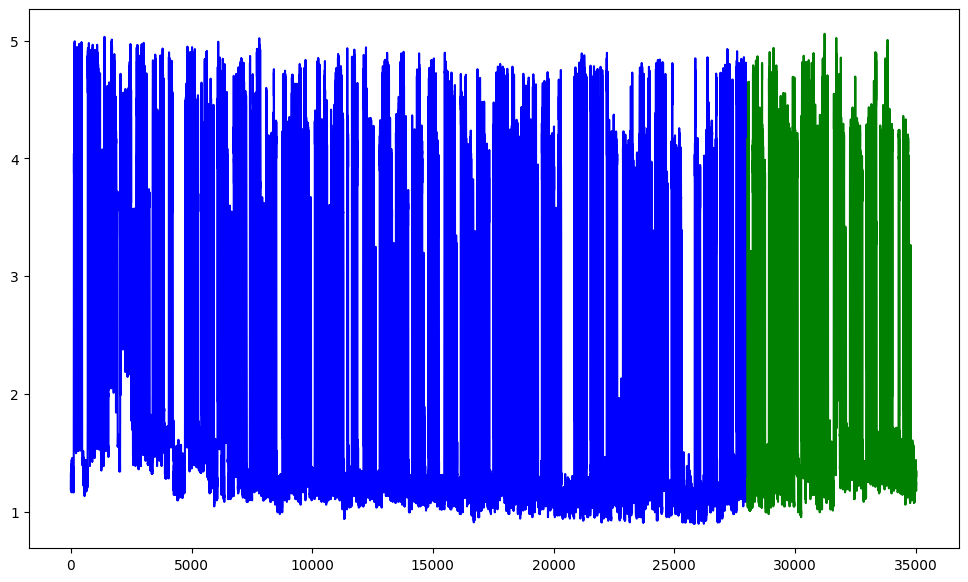

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(y_train, label='True Usage (Train)', color='blue')
plt.plot(range(y_train.shape[0], y_train.shape[0] + y_test.shape[0]), y_test, label='True Usage (Test)', color='green')


# GRU

In [ ]:
from nn.gru_model import SequenceGRU
from nn.losses.mse import MSE

n_in = 18
n_out = 1
n_hidden = 128
# optimizer = Adam(learning_rate=0.001)
model = SequenceGRU(n_inputs=n_in, n_hidden=n_hidden, n_outputs=n_out, time_steps=5)
loss_fn = MSE()

# Train
history = model.train(X_train, y_train, X_test, y_test, epochs=10, batch_size=16, learning_rate=1e-3, loss_fn=loss_fn)

100%|█████████▉| 1745/1751.6875 [00:22<00:00, 77.81it/s]d:\vscode\Учеба\FOSII\venv\Lib\site-packages\tqdm\std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 1752/1751.6875 [00:22<00:00, 77.26it/s]


Epoch 1/10 - loss: 0.1953 - val_loss: inf


100%|██████████| 1752/1751.6875 [00:22<00:00, 76.85it/s]


Epoch 2/10 - loss: 0.1316 - val_loss: inf


100%|██████████| 1752/1751.6875 [00:23<00:00, 75.17it/s]


Epoch 3/10 - loss: 0.1153 - val_loss: inf


100%|██████████| 1752/1751.6875 [00:22<00:00, 77.57it/s]


Epoch 4/10 - loss: 0.1067 - val_loss: inf


100%|██████████| 1752/1751.6875 [00:22<00:00, 77.76it/s]


Epoch 5/10 - loss: 0.1006 - val_loss: inf


100%|██████████| 1752/1751.6875 [00:22<00:00, 77.36it/s]


Epoch 6/10 - loss: 0.0959 - val_loss: inf


100%|██████████| 1752/1751.6875 [00:22<00:00, 78.33it/s]


Epoch 7/10 - loss: 0.0918 - val_loss: inf


100%|██████████| 1752/1751.6875 [00:22<00:00, 78.53it/s]


Epoch 8/10 - loss: 0.0882 - val_loss: inf


100%|██████████| 1752/1751.6875 [00:22<00:00, 78.00it/s]


Epoch 9/10 - loss: 0.0850 - val_loss: inf


100%|██████████| 1752/1751.6875 [00:22<00:00, 77.42it/s]

Epoch 10/10 - loss: 0.0827 - val_loss: inf
